## Dataset load

In [15]:
import pandas as pd
df = pd.read_csv('tasnim.csv')


## Preprocesing

In [12]:
with open('stopwords.txt',  encoding="utf-8") as stopwords_file:
    stopwords = stopwords_file.readlines()
len(stopwords)

875

In [13]:
import nltk
nltk.download('stopwords')
nltk_stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(nltk_stopwords)
len(stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1054

In [17]:
import hazm
from hazm import word_tokenize

stemmer = hazm.Stemmer()
dataset = pd.DataFrame(columns=('title_body', 'category'))
for index, row in df.iterrows():
    title_body = str(row['title'] )+ ' ' +str( row['body'])
    title_body_tokenized = word_tokenize(title_body)
    title_body_tokenized_filtered = [w for w in title_body_tokenized if not w in stopwords]
    title_body_tokenized_filtered_stemmed = [stemmer.stem(w) for w in title_body_tokenized_filtered]
    dataset.loc[index] = {
        'title_body': ' '.join(title_body_tokenized_filtered_stemmed),
        'category': row['category'].replace('\n', '')
    }

### category mapping

In [18]:
unique_categories = df['category'].unique()

print("انواع موضوعات موجود در ستون category:")
for category in unique_categories:
    print(category)

انواع موضوعات موجود در ستون category:
سیاسی
اجتماعی
ورزشی
فرهنگی هنری
استان‌ها
اقتصادی
بین الملل
رسانه ها


In [26]:
category_mapping = {
    'سیاسی': 1,
    'اجتماعی': 2,
    'ورزشی': 3,
    'فرهنگی هنری': 4,
    'استان‌ها': 5,
    'بین الملل': 6,
    'رسانه ها': 7,
}

# تبدیل مقادیر ستون category به اعداد
dataset['category'] = dataset['category'].map(category_mapping)

In [42]:
dataset['category']=df['category']

## Vectorize

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
dataset['category'] = dataset['category'].fillna(-1)
x= vectorizer.fit_transform(dataset['title_body'])
y = dataset['category']

### train_test_split

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Calculate Metrics

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
    acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)
    precision = precision_score(y_true=y_test, y_pred=y_pred_test, average='weighted')
    recall = recall_score(y_true=y_test, y_pred=y_pred_test, average='weighted')
    
    print(f"accuracy train: {acc_train}   accuracy test: {acc_test}    precision: {precision}    recall: {recall}")
    return acc_train, acc_test, precision, recall


multinomial naive bayes

In [47]:
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

acc_train_NB,acc_test_NB,precision_NB,recall_NB = calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

accuracy train: 0.788305935623585   accuracy test: 0.7766753287660446    precision: 0.7945534585420253    recall: 0.7766753287660446


SVM

In [48]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

acc_train_SVM,acc_test_SVM,precision_SVM,recall_SVM = calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

accuracy train: 0.9524165764346885   accuracy test: 0.8985746909205449    precision: 0.8981343951400242    recall: 0.8985746909205449


Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators= 128 , max_depth= 128 , min_samples_split=3)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

acc_train_RF,acc_test_RF,precision_RF,recall_RF = calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

accuracy train: 0.9984053548577616   accuracy test: 0.8541617450192929    precision: 0.8532379182473668    recall: 0.8541617450192929


## Comparison

1- Train Accuracy

2- Test Accuracy

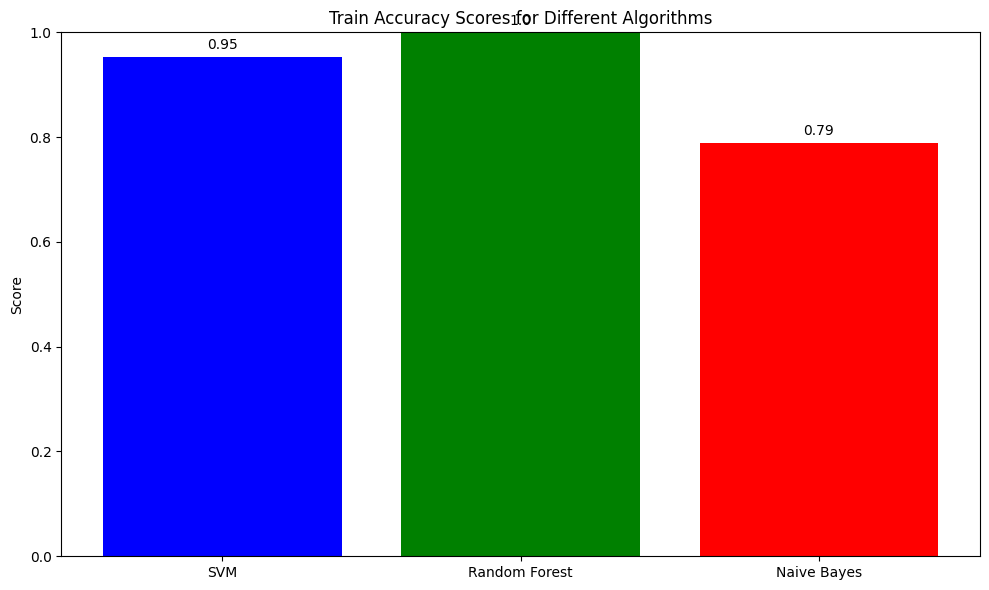

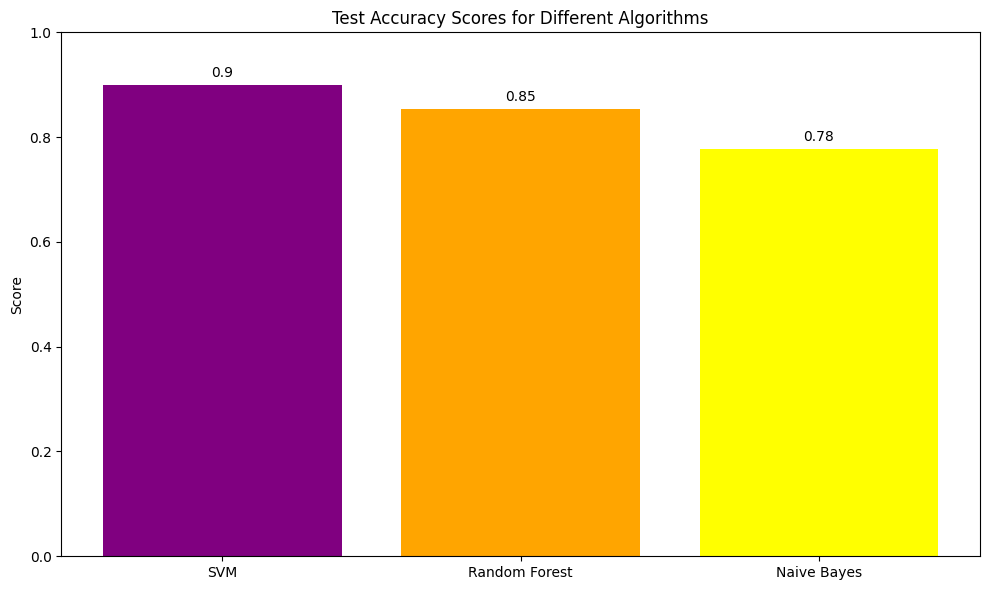

In [50]:
import matplotlib.pyplot as plt

metrics_acc_train = ['SVM', 'Random Forest', 'Naive Bayes']
values_acc_train = [acc_train_SVM, acc_train_RF, acc_train_NB]

metrics_acc_test = ['SVM', 'Random Forest', 'Naive Bayes']
values_acc_test = [acc_test_SVM, acc_test_RF, acc_test_NB]

x_acc_train = range(len(metrics_acc_train))
x_acc_test = range(len(metrics_acc_test))

plt.figure(figsize=(10, 6))
plt.bar(x_acc_train, values_acc_train, color=['blue', 'green', 'red'])

plt.xticks(x_acc_train, metrics_acc_train)
for i, value in enumerate(values_acc_train):
    plt.text(i, value + 0.01, str(round(value, 2)), ha='center', va='bottom')

plt.title('Train Accuracy Scores for Different Algorithms')
plt.ylabel('Score')
plt.ylim(0, 1)  
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(x_acc_test, values_acc_test, color=['purple', 'orange', 'yellow'])

plt.xticks(x_acc_test, metrics_acc_test)
for i, value in enumerate(values_acc_test):
    plt.text(i, value + 0.01, str(round(value, 2)), ha='center', va='bottom')

plt.title('Test Accuracy Scores for Different Algorithms')
plt.ylabel('Score')
plt.ylim(0, 1) 
plt.tight_layout()
plt.show()

3- Precision

4- Recall

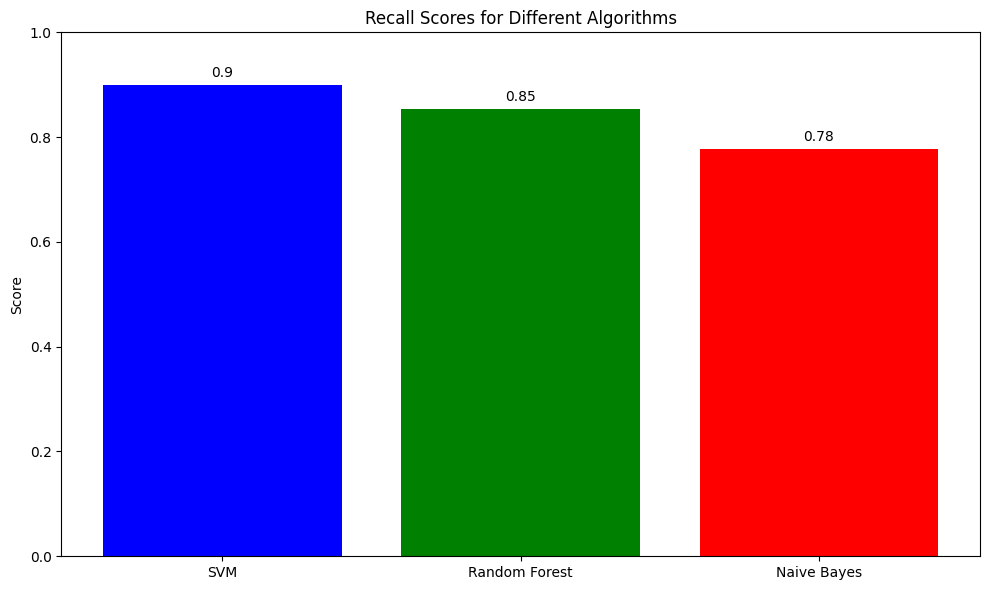

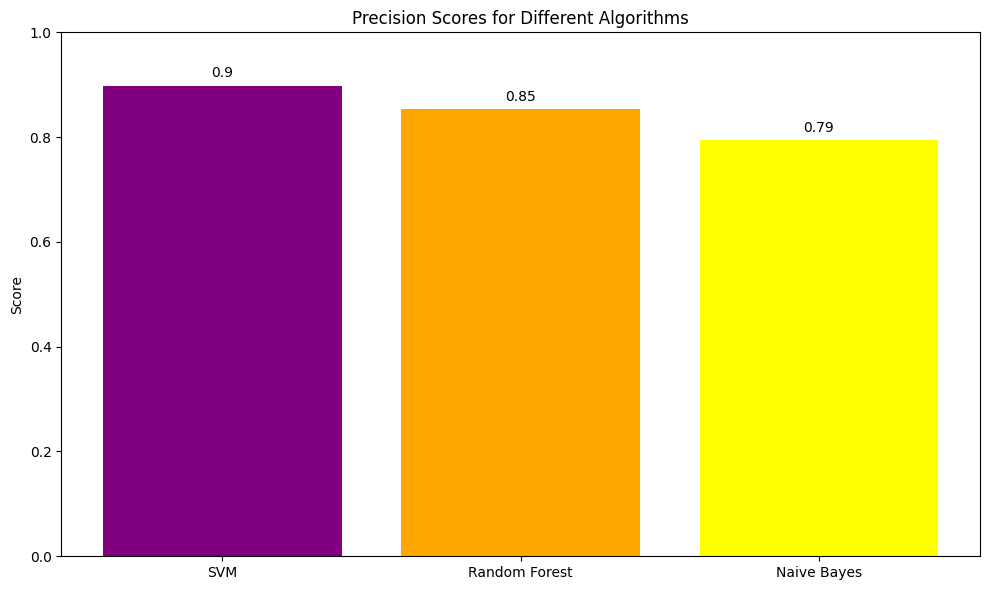

In [51]:
metrics_recall = ['SVM', 'Random Forest', 'Naive Bayes']
values_recall = [recall_SVM, recall_RF, recall_NB]

metrics_precision = ['SVM', 'Random Forest', 'Naive Bayes']
values_precision = [precision_SVM, precision_RF, precision_NB]

x_recall = range(len(metrics_recall))
x_precision = range(len(metrics_precision))

plt.figure(figsize=(10, 6))
plt.bar(x_recall, values_recall, color=['blue', 'green', 'red'])

plt.xticks(x_recall, metrics_recall)
for i, value in enumerate(values_recall):
    plt.text(i, value + 0.01, str(round(value, 2)), ha='center', va='bottom')

plt.title('Recall Scores for Different Algorithms')
plt.ylabel('Score')
plt.ylim(0, 1)  
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
plt.bar(x_precision, values_precision, color=['purple', 'orange', 'yellow'])

plt.xticks(x_precision, metrics_precision)
for i, value in enumerate(values_precision):
    plt.text(i, value + 0.01, str(round(value, 2)), ha='center', va='bottom')

plt.title('Precision Scores for Different Algorithms')
plt.ylabel('Score')
plt.ylim(0, 1) 
plt.tight_layout()
plt.show()